# 6.2: Exploring Relationships


# Contents

### 01. Importing libraries
### 02. Importing data
### 03. Data consistency check
### 04. Change data types I have missed
### 05. Exploring Relationships
#### Correlations
#### Scatterplot
#### Pairplots
#### Categorical plot

## 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import time
import datetime
from datetime import date

## 02. Importing data

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Sulo\Desktop\Careerfoundry\Immersion'

In [4]:
df = pd.read_csv(os.path.join(path, 'Achievement 6', 'Prepared Data', 'immo_cleaned.csv'), index_col = False)

## 03. Data consistency check

In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,...,baseRentRange,typeOfFlat,noRooms,floor,garden,city/district,neighbourhood,year,pricepm2,additionalcost
0,Nordrhein_Westfalen,245.0,central_heating,FALSCH,FALSCH,840.0,1965.0,FALSCH,WAHR,595,...,4,ground_floor,4,1.0,WAHR,Dortmund,Schüren,01.05.2019,6.918605,245.0
1,Sachsen,70.0,self_contained_central_heating,FALSCH,FALSCH,380.0,1958.0,FALSCH,WAHR,310,...,2,apartment,2,1.0,WAHR,Mittelsachsen_Kreis,Freiberg,01.02.2020,5.000000,70.0
2,Baden_Württemberg,110.0,oil_heating,FALSCH,FALSCH,690.0,1970.0,WAHR,WAHR,580,...,4,roof_storey,2,2.0,FALSCH,Emmendingen_Kreis,Denzlingen,01.02.2020,10.943396,110.0
3,Sachsen,88.0,central_heating,FALSCH,WAHR,307.0,1930.0,FALSCH,WAHR,219,...,1,apartment,2,3.0,FALSCH,Chemnitz,Sonnenberg,01.10.2019,0.544776,88.0
4,Schleswig_Holstein,140.0,central_heating,FALSCH,WAHR,1450.0,1978.0,FALSCH,WAHR,1150,...,7,ground_floor,4,0.0,WAHR,Neumünster,Wittorf,01.10.2019,7.187500,300.0


In [7]:
df.shape

(80057, 24)

In [8]:
df.columns

Index(['state', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent',
       'livingSpace', 'condition', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'floor', 'garden', 'city/district',
       'neighbourhood', 'year', 'pricepm2', 'additionalcost'],
      dtype='object')

In [9]:
# Check for duplicates
df_dups = df[df.duplicated()]

In [10]:
df_dups

,state,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,baseRent,...,baseRentRange,typeOfFlat,noRooms,floor,garden,city/district,neighbourhood,year,pricepm2,additionalcost
3691,Niedersachsen,160.0,central_heating,FALSCH,FALSCH,480.0,1955.0,WAHR,WAHR,320,...,2,roof_storey,2,2.0,WAHR,Goslar_Kreis,Liebenburg,01.05.2019,5.079365,160.0
4571,Sachsen,70.0,central_heating,FALSCH,WAHR,426.0,1970.0,WAHR,WAHR,276,...,1,apartment,4,2.0,FALSCH,Görlitz_Kreis,Löbau,01.09.2018,4.000000,150.0
4740,Sachsen,100.0,central_heating,FALSCH,WAHR,355.0,1992.0,FALSCH,WAHR,255,...,1,apartment,2,1.0,WAHR,Chemnitz,Gablenz,01.05.2019,5.000000,100.0
5364,Nordrhein_Westfalen,300.0,self_contained_central_heating,FALSCH,WAHR,1600.0,1972.0,WAHR,WAHR,1300,...,7,apartment,3,13.0,FALSCH,Köln,Altstadt_&_Neustadt_Nord,01.09.2018,12.745098,300.0
6159,Sachsen_Anhalt,90.0,central_heating,FALSCH,FALSCH,555.0,1961.0,FALSCH,FALSCH,345,...,2,other,4,4.0,FALSCH,Halle_Saale,Südstadt,01.02.2020,5.000000,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79584,Hessen,300.0,central_heating,FALSCH,FALSCH,990.0,1964.0,WAHR,FALSCH,690,...,5,apartment,2,1.0,FALSCH,Frankfurt_am_Main,Sachsenhausen_Nord,01.05.2019,14.081633,300.0
79609,Berlin,380.0,central_heating,FALSCH,WAHR,1710.0,1961.0,FALSCH,FALSCH,1330,...,7,apartment,5,3.0,FALSCH,Berlin,Adlershof_Treptow,01.02.2020,8.750000,380.0
79728,Thüringen,120.0,central_heating,FALSCH,WAHR,410.0,1972.0,FALSCH,WAHR,290,...,1,apartment,3,5.0,FALSCH,Gera,Lusan_Zentrum,01.05.2019,5.000000,120.0
79817,Nordrhein_Westfalen,153.5,central_heating,FALSCH,WAHR,903.5,1961.0,FALSCH,WAHR,750,...,5,roof_storey,2,3.0,WAHR,Köln,Zündorf,01.02.2020,15.000000,153.5


In [11]:
# Drop the duplicates
df= df.drop_duplicates()

In [12]:
# Check if it worked
df.shape

(79386, 24)

In [13]:
df.dtypes

state               object
serviceCharge      float64
heatingType         object
newlyConst          object
balcony             object
totalRent          float64
yearConstructed    float64
hasKitchen          object
cellar              object
baseRent             int64
livingSpace          int64
condition           object
petsAllowed         object
lift                object
baseRentRange        int64
typeOfFlat          object
noRooms              int64
floor              float64
garden              object
city/district       object
neighbourhood       object
year                object
pricepm2           float64
additionalcost     float64
dtype: object

In [14]:
# Check for mixed data types
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        # no mixed data types

In [15]:
# Check for missing values

df.isnull().sum() # No missing values!

state              0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
cellar             0
baseRent           0
livingSpace        0
condition          0
petsAllowed        0
lift               0
baseRentRange      0
typeOfFlat         0
noRooms            0
floor              0
garden             0
city/district      0
neighbourhood      0
year               0
pricepm2           0
additionalcost     0
dtype: int64

## 04. Change data types I have missed and add 1 column

In [16]:
df.dtypes

state               object
serviceCharge      float64
heatingType         object
newlyConst          object
balcony             object
totalRent          float64
yearConstructed    float64
hasKitchen          object
cellar              object
baseRent             int64
livingSpace          int64
condition           object
petsAllowed         object
lift                object
baseRentRange        int64
typeOfFlat          object
noRooms              int64
floor              float64
garden              object
city/district       object
neighbourhood       object
year                object
pricepm2           float64
additionalcost     float64
dtype: object

In [17]:
df['buildingAge'] = date.today().year - df["yearConstructed"]

In [18]:
df['newlyConst'] = df['newlyConst'].astype('bool')


In [19]:
df['balcony'] = df['balcony'].astype('bool')

In [20]:
df['hasKitchen'] = df['hasKitchen'].astype('bool')

In [21]:
df['cellar'] = df['cellar'].astype('bool')

In [22]:
df['lift'] = df['lift'].astype('bool')

In [23]:
df['garden'] = df['garden'].astype('bool')

## 05. Exploring Relationships

### Correlations:

In [24]:
# I want to actually use the boolean values or even the objects like condition, heating type and such for the correlation map
# I don't understand how to do that or if it possible, I wanted to convert them maybe into integers but I couldn't do that
# Maybe you could give some advice because it's very important to compare the categories or booleans that each other
# I want to be able to do that because it should work but doesn't, if you know how please let me know
# if I can only do it for booleans or even objects 

In [25]:
# attempt with booleans

# sub = df[['serviceCharge', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'cellar', 'baseRent','livingSpace', 'lift', 'baseRentRange','noRooms', 'floor', 'garden', 'pricepm2', 'additionalcost']]

In [26]:
# sub.corr() with booleans values doesn't work same goes for objects that is very annoying

In [27]:
# Create a subset that works for the correlation
sub = df[['serviceCharge','totalRent', 'yearConstructed', 'baseRent','livingSpace', 'baseRentRange','noRooms', 'floor', 'pricepm2', 'additionalcost', 'buildingAge']]

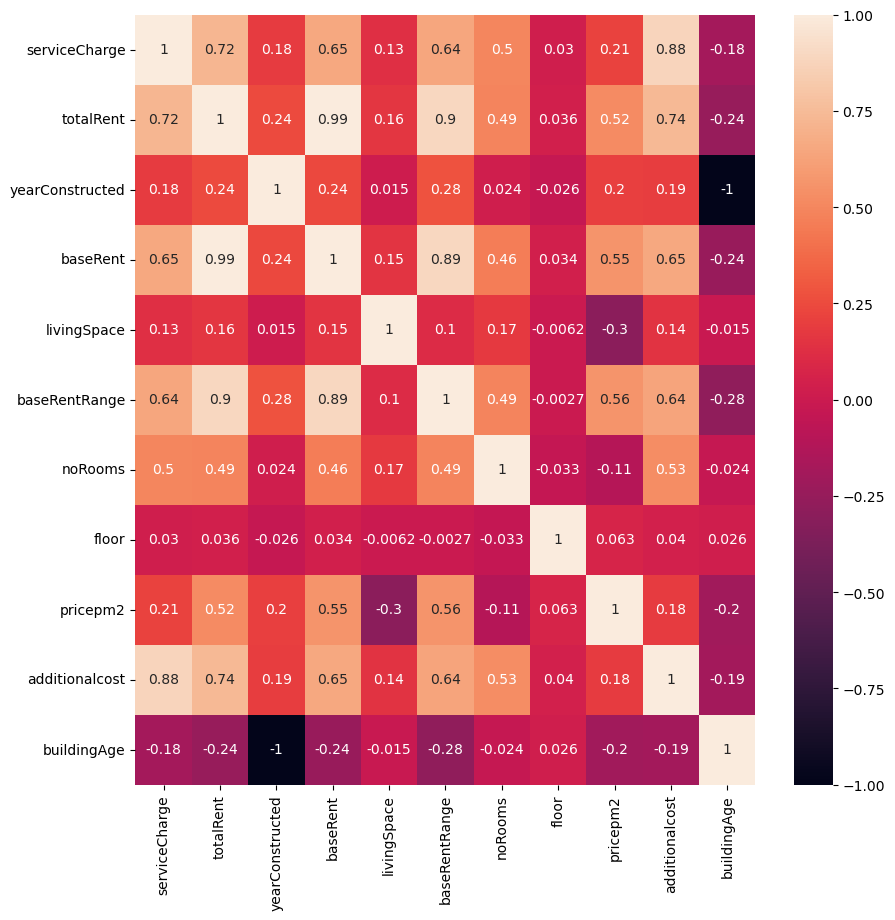

In [28]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

#### If we look at the year of construction and the total rent we see that the correlation is low, I would like to compare it to categorical variables but I couldn't do it as stated as above. It's cool to see that there is a medium correlation between total rent and number of romms that make sense. 

### Scatterplot:

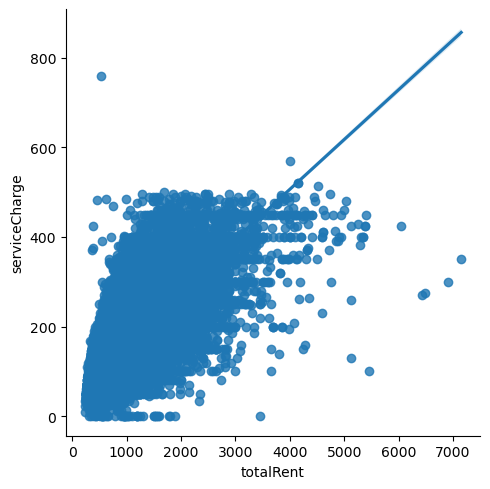

In [29]:
# Create a scatterplot for the 'totalRent' and 'serviceCharge' columns in seaborn

sns.lmplot(x = 'totalRent', y = 'serviceCharge', data = df)

#### This correlation makes perfectly sense because the more rent a apartment cost the higher the service charge is.

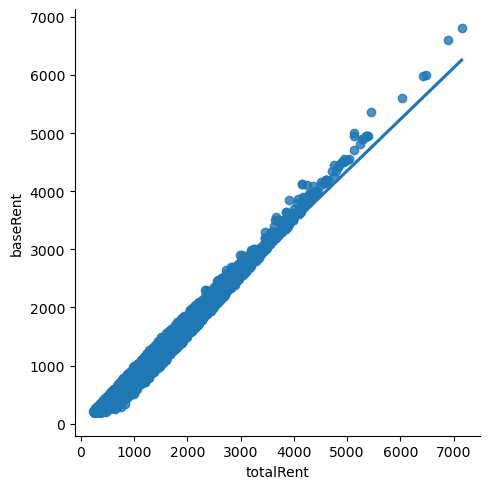

In [30]:
# Create a scatterplot for the 'totalRent' and 'baseRent' columns in seaborn

sns.lmplot(x = 'totalRent', y = 'baseRent', data = df)

#### This is basically a perfect correlation because the higher the total rent is the closer the base price is aswell. So if the total rent is higher the base rent increases aswell

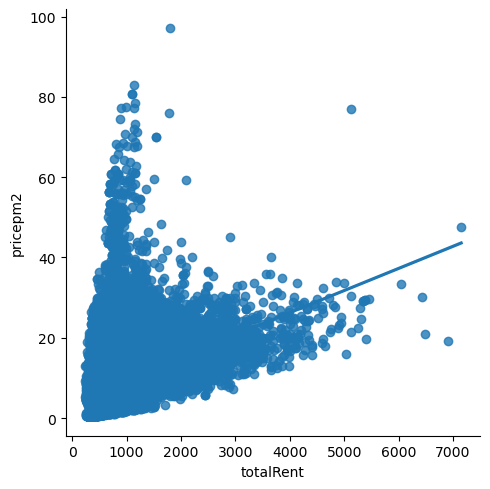

In [31]:
# Create a scatterplot for the 'totalRent' and 'pricepm2' columns in seaborn

sns.lmplot(x = 'totalRent', y = 'pricepm2', data = df)

#### Here the lower the rent is the higher the price is per square meter, showing that you pay more for sqm on the lower rents, compared to higher rent price that are mostly fair

### Pairplots:

In [32]:
sub_2 = sub[['serviceCharge','totalRent', 'noRooms', 'pricepm2']]

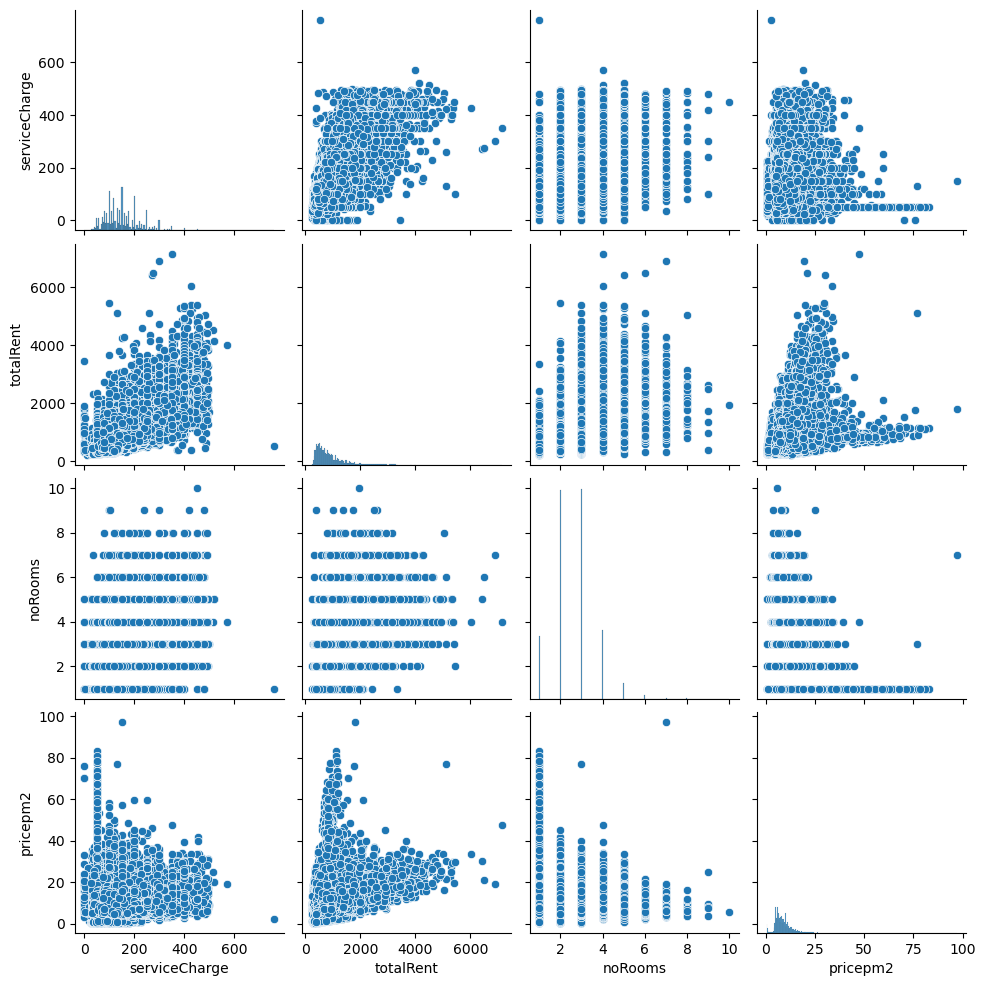

In [33]:
# Create a pair plot 

pair = sns.pairplot(sub_2)

#### The pair plots from noRooms are very neat, showing they are very good structured. Pricepm2 and totalRent are showing a split direction meaning the lower a price is the higher the outlier and vice versa for higher price. I want to explore pricepm2. I also wanted to do categories but I don't know if that will work.

### Categorical plot:

<Axes: xlabel='totalRent', ylabel='Count'>

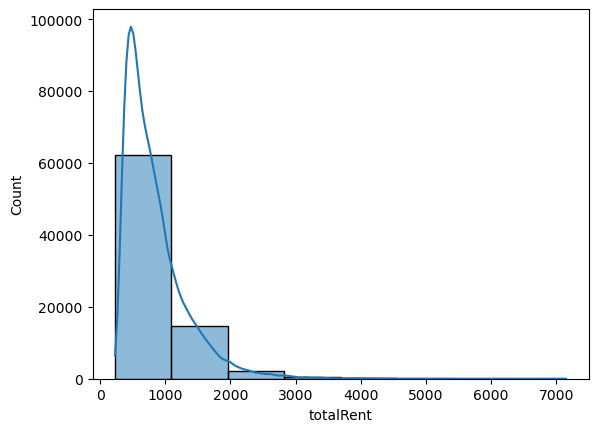

In [34]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df['totalRent'], bins = 8, kde = True)

In [35]:
# Create a new columns with the totalRent variable
df.loc[df['totalRent'] < 1200, 'Rent price category'] = 'Low rent'

In [36]:
df.loc[(df['totalRent'] >= 1200) & (df['totalRent'] < 2000), 'Rent price category'] = 'Middle rent'

In [37]:
df.loc[df['totalRent'] >= 2000, 'Rent price category'] = 'High rent'

In [38]:
df['Rent price category'].value_counts(dropna = False)

Rent price category
Low rent       65524
Middle rent    11462
High rent       2400
Name: count, dtype: int64

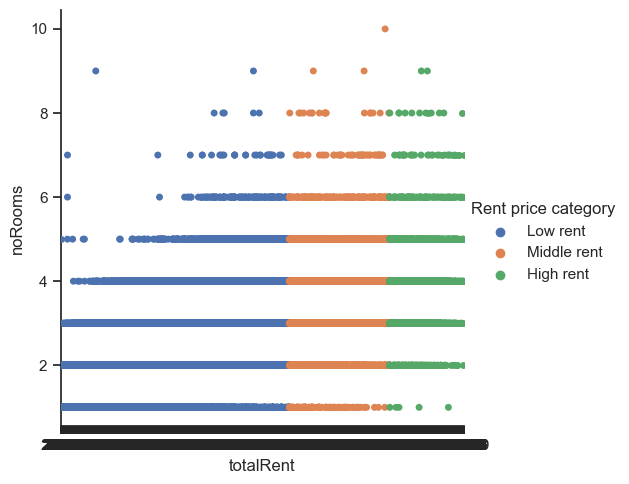

In [40]:
# Categorical plot to interpret the results
sns.set(style="ticks")
catg = sns.catplot(x="totalRent", y="noRooms", hue="Rent price category", data=df)

#### This data shows that there are some values that have high number of rooms but low rent, that makes no sense, that means that there is some faulty data there. I could remove the number of rooms from max 10 rooms to 9 rooms or even 8. It also shows that there is not as much correlation there, it could be as example 5 rooms low rent but in a bad part of town. So don't take everything at face value but keep that in mind. The prices though increase after 3 rooms in increasing the threshold of the price but the more rooms there are the higher the rent cost.

### Revision questions

#### What factors contribute to fluctuations in rental prices, and can we build predictive models? There is not a lot of information about qualitative data, but for quantitative data number of rooms, pricepm2, serviceCharge and additional cost play the most factoring roles.
#### Are there correlations between property age and rental prices? There is a weak correlation between them but very old and very new buildings cost the most in terms of rent. 

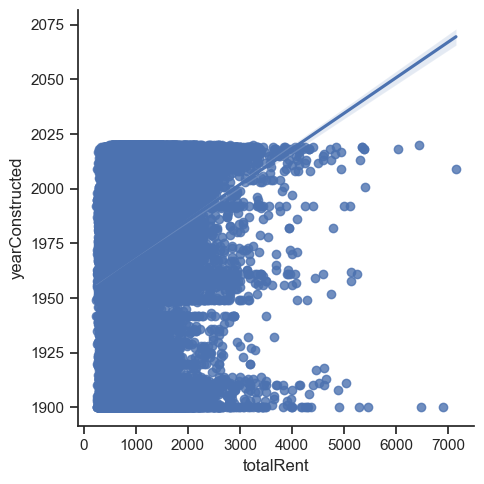

In [43]:
# Create a scatterplot for the 'totalRent' and 'yearConstructed' columns in seaborn

sns.lmplot(x = 'totalRent', y = 'yearConstructed', data = df)

#### I don't really have new questions it's more about questions that could be answered with qualitative data. Like what is the correlation between all of the data and total rent? Where are the most listing of the apartments?

### Hypothesis

#### At this point I can't really form a hypothesis yet, I need more information about the geographical data and the qualitative data so I'm certain what matters and what doesn't. Just based on my knowledge I would say that the most expensive cities are Hamburg, Munich and Berlin. Besides that I can't form any real hypotheses because I need more information about the other data. After that I will be able to form them. 

In [44]:
#Exporting df_listings (non-subset, with category flags applied)
df.to_csv(os.path.join(path, 'Achievement 6','Prepared Data', 'immo_v2.csv'))